# Name: Dave Zack
### Date: August 15, 2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

<img src="https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg" alt="logo" style="position: fixed; top: -40px; left: 5px; height: 250px;">

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: XX.X points per game  
- 2nd Team: XX.X points per game  
- 3rd Team: XX.X points per game  
- All-Star: XX.X points per game   

**Question 2:** XX.X Years  

**Question 3:** 

- Elite: X players.  
- All-Star: X players.  
- Starter: X players.  
- Rotation: X players.  
- Roster: X players.  
- Out of League: X players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** XX.X%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [1]:
# Must-have packages
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("./awards_data.csv")
player_data = pd.read_csv("./player_stats.csv")
team_data = pd.read_csv("./team_stats.csv")
rebounding_data = pd.read_csv("./team_rebounding_data_22.csv")

## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

In [3]:
# Check the columns on the awards df to see how to best
# calculate the criteria listed in the question.
awards.head()

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,Player Of The Month,Player Of The Week,Rookie Of The Month,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN


In [4]:
# Create an AllNBA_AllStar column to capture those players who made
# All NBA First, Second, or Third teams or the all star game.
awards['AllNBA_AllStar'] = np.any(awards.loc[:,['All NBA First Team', 
                                                'All NBA Second Team', 
                                                'All NBA Third Team', 
                                                'all_star_game']], axis = 1)
awards['AllNBA_AllStar'] = awards['AllNBA_AllStar'].astype(bool)
# Subset the dataframe for easier computation
all_nba_df = awards.loc[:,['nbapersonid',
                           'All NBA First Team', 
                           'All NBA Second Team', 
                           'All NBA Third Team', 
                           'all_star_game',
                           'AllNBA_AllStar']]

In [5]:
# Check the player_data df to see how to manipulate the results
player_data.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,107,245,0.437,0,3,0.000,107,242,0.442,0.437,108,153,0.706,89,159,248,36,24,13,69,140,322,11.0,0.624,0.110,0.195,0.153,0.060,0.013,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,12,30,0.400,0,2,0.000,12,28,0.429,0.400,11,20,0.550,19,23,42,0,3,5,11,28,35,6.8,0.667,0.153,0.184,0.169,0.000,0.011,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,518,1133,0.457,25,99,0.253,493,1034,0.477,0.468,333,469,0.710,161,506,667,272,123,227,245,269,1394,19.0,0.414,0.066,0.204,0.135,0.166,0.023,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,95,237,0.401,7,34,0.206,88,203,0.433,0.416,38,48,0.792,12,45,57,113,29,0,56,73,235,7.7,0.203,0.016,0.060,0.038,0.204,0.018,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,65,180,0.361,29,85,0.341,36,95,0.379,0.442,41,50,0.820,4,20,24,28,7,5,21,34,200,11.1,0.278,0.012,0.058,0.035,0.119,0.009,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1


In [6]:
# Calculate a points per game column using the player df
player_data['ppg'] = player_data['points']/player_data['games']
# Subset the dataframe for easier computation
points_df = player_data.loc[:,['nbapersonid','ppg']]

In [7]:
# Merge the all nba and points dataframes and then 
# calculate the all nba first, second, and third 
# team ppgs as well as the all star ppg.
combined_df = all_nba_df.merge(points_df, on='nbapersonid')
first_team_ppg = combined_df.groupby('All NBA First Team')['ppg'].mean()
second_team_ppg = combined_df.groupby('All NBA Second Team')['ppg'].mean()
third_team_ppg = combined_df.groupby('All NBA Third Team')['ppg'].mean()
all_star_ppg = combined_df.groupby('all_star_game')['ppg'].mean()

print('First Team PPG:', first_team_ppg)
print('Second Team PPG:', second_team_ppg)
print('Third Team PPG:', third_team_ppg)
print('All Star PPG:', all_star_ppg)

First Team PPG: All NBA First Team
0.0    15.496465
1.0    22.309687
Name: ppg, dtype: float64
Second Team PPG: All NBA Second Team
0.0    15.912391
1.0    19.602454
Name: ppg, dtype: float64
Third Team PPG: All NBA Third Team
0.0    16.210585
1.0    17.406737
Name: ppg, dtype: float64
All Star PPG: all_star_game
False    13.562048
True     18.734007
Name: ppg, dtype: float64


<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 22.3 points per game  
2nd Team: 19.6 points per game  
3rd Team: 17.4 points per game  
All-Star: 18.7 points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [8]:
# Only include players drafter in 2007 or later
players_2007 = player_data.loc[player_data['draftyear'] >= 2007,
                               ['nbapersonid',
                                'season',
                                'player',
                                'draftyear']]
# Only include players who made All NBA
awards['AllNBA'] = np.any(awards.loc[:,['All NBA First Team', 
                                        'All NBA Second Team', 
                                        'All NBA Third Team']], axis = 1)
all_nba = awards.loc[awards['AllNBA'] == True,
                     ['season',
                      'nbapersonid',
                      'AllNBA']]

# Merge the dataframes, drop duplicate entries for players, and
# calculate the mean experience
all_nba = all_nba.merge(players_2007, 
                        on=['nbapersonid','season'])
all_nba.drop_duplicates('player')
all_nba['experience'] = all_nba['season'] - all_nba['draftyear'] + 1
print(all_nba['experience'].mean())

6.68


<strong><span style="color:red">ANSWER 2:</span></strong>  

6.7 Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

In [9]:
# Let's start by calculating the games, starts, and minutes
# of each player during the lockout season and COVID seasons
player_data.loc[player_data['season'] == 2011,
                ['games',
                 'games_start',
                 'mins']] = player_data.loc[player_data['season'] == 2011,
                                            ['games',
                                             'games_start',
                                             'mins']] * (82/66)

player_data.loc[(player_data['season'] == 2019) | (player_data['season'] == 2020),
                ['games',
                 'games_start',
                 'mins']] = player_data.loc[(player_data['season'] == 2019) | (player_data['season'] == 2020),
                                            ['games',
                                             'games_start',
                                             'mins']] * (82/66)

player_data.loc[:,['games','games_start','mins']] = \
    np.round(player_data.loc[:,['games','games_start','mins']])

In [10]:
# Check to make sure the calculation worked
player_data.loc[player_data['season'] == 2011].head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,ppg
2094,2209,Vladimir Radmanovic,2001,12.0,2011,1610612737,ATL,61.0,4.0,938.0,74,197,0.376,50,135,0.370,24,62,0.387,0.503,22,29,0.759,34,109,143,54,21,15,35,62,220,11.7,0.147,0.053,0.168,0.111,0.109,0.015,0.015,0.143,0.152,0.5,1.1,1.6,-0.4,0.6,0.2,0.4,4.489796
2095,202388,Donald Sloan,2010,NaN,2011,1610612737,ATL,6.0,0.0,25.0,3,8,0.375,0,1,0.000,3,7,0.429,0.375,0,0,NaN,1,4,5,5,1,0,2,3,6,11.6,0.000,0.059,0.233,0.147,0.416,0.027,0.000,0.200,0.235,0.0,0.0,0.0,-5.4,1.8,-3.6,0.0,1.200000
2096,1503,Tracy McGrady,1997,9.0,2011,1610612737,ATL,65.0,0.0,1040.0,101,231,0.437,15,33,0.455,86,198,0.434,0.470,56,83,0.675,23,131,154,110,16,15,53,35,273,13.6,0.359,0.033,0.182,0.108,0.208,0.010,0.014,0.165,0.180,0.5,1.1,1.6,-0.1,0.7,0.6,0.5,5.250000
2097,956,Erick Dampier,1996,10.0,2011,1610612737,ATL,19.0,0.0,103.0,1,8,0.125,0,0,NaN,1,8,0.125,0.125,0,0,NaN,10,15,25,4,1,4,3,9,2,5.5,0.000,0.143,0.210,0.177,0.065,0.006,0.037,0.273,0.062,-0.1,0.1,0.1,-4.9,0.2,-4.7,-0.1,0.133333
2098,201143,Al Horford,2007,3.0,2011,1610612737,ATL,14.0,14.0,432.0,57,103,0.553,0,1,0.000,57,102,0.559,0.553,22,30,0.733,26,51,77,24,10,14,16,21,136,19.0,0.291,0.088,0.171,0.130,0.117,0.015,0.031,0.121,0.179,0.8,0.6,1.3,1.8,1.5,3.4,0.5,12.363636


In [11]:
# Add an experience column
player_data['experience'] = player_data['season'] - player_data['draftyear'] + 1

In [12]:
# Create columns for MVP and DPOY
awards['MVP'] = awards['Most Valuable Player_rk'] == 1
awards['DPOY'] = awards['Defensive Player Of The Year_rk'] == 1

In [13]:
# Calculate whether or not a player was elite in a given season
awards['Elite'] = np.any(awards.loc[:,['All NBA First Team', 
                                       'All NBA Second Team', 
                                       'All NBA Third Team', 
                                       'MVP',
                                       'DPOY']], axis = 1)

In [14]:
# Merge whether or not a player was elite or an all star with the player
# data df
elite_df = awards.loc[:,['season','nbapersonid','all_star_game','Elite']]
player_data = player_data.merge(elite_df, how='left', on=['season','nbapersonid'])

In [15]:
# Rename the 'all_star_game' column 'All Star', fill all NaN values
# to be equal to true
player_data.rename({'all_star_game': 'All Star'}, axis=1, inplace=True)
player_data['All Star'].fillna(False, inplace=True)
player_data['Elite'].fillna(False, inplace=True)

In [16]:
# Define the 'Starter' career outcome column
player_data['Starter'] = (player_data['games_start'] >= 41) | \
                            (player_data['mins'] >= 2000)

In [17]:
# Define the Rotation and Roster career outcome columns
player_data['Rotation'] = player_data['mins'] >= 1000
player_data['Roster'] = player_data['mins'] >= 1

player_df = player_data.loc[:,
                            ['nbapersonid',
                             'player',
                             'season',
                             'draftyear',
                             'experience',
                             'Elite',
                             'All Star',
                             'Starter',
                             'Rotation',
                             'Roster']]
player_df.head()

,nbapersonid,player,season,draftyear,experience,Elite,All Star,Starter,Rotation,Roster
0,2585,Zaza Pachulia,2007,2003,5,False,False,False,False,True
1,200780,Solomon Jones,2007,2006,2,False,False,False,False,True
2,2746,Josh Smith,2007,2004,4,False,False,True,True,True
3,201151,Acie Law,2007,2007,1,False,False,False,False,True
4,101136,Salim Stoudamire,2007,2005,3,False,False,False,False,True


In [18]:
# Create a function that will define the career outcome of each player
def define_career_outcomes(player_df):
    # Default value is for player to be Out of the League
    player_df['Career Outcome'] = 'Out of League'
    # Creates a list of the unique players in the df
    players = player_df['player'].unique()
    # Loop through each player
    for player in players:
        # Create a df that only contains info for the current player
        p_df = player_df.loc[player_df['player'] == player, :]
        # Only take into account years after number 4
        p_df = p_df.loc[p_df['experience'] >= 4]
        # If a player was elite >= 2 times they are elite
        if np.sum(p_df['Elite']) >= 2:
            player_df.loc[player_df['player'] == player, 'Career Outcome'] = 'Elite'
        # Otherwise if they were an all star >= 2 times they are an all star
        elif np.sum([p_df['All Star'], p_df['Elite']]) >= 2:
            player_df.loc[player_df['player'] == player, 'Career Outcome'] = 'All Star'
        # Otherwise if they were a starter >= 2 times they are a starter
        elif np.sum([p_df['Starter'], p_df['All Star'], p_df['Elite']]) >= 2:
            player_df.loc[player_df['player'] == player, 'Career Outcome'] = 'Starter'
        # Otherwise if they were a rotation player >= 2 times they are a rotation player
        elif np.sum([p_df['Rotation'], p_df['Starter'], p_df['All Star'], p_df['Elite']]) >= 2:
            player_df.loc[player_df['player'] == player, 'Career Outcome'] = 'Rotation'
        # Otherwise if they were on a roster >= 2 times they are a roster player
        elif np.sum([p_df['Roster'], p_df['Rotation'], p_df['Starter'], p_df['All Star'], p_df['Elite']]) >= 2:
            player_df.loc[player_df['player'] == player, 'Career Outcome'] = 'Roster'
    
    return player_df

In [19]:
# Create the career outcomes for each player in the player_df
player_df = define_career_outcomes(player_df)
player_df.head()

,nbapersonid,player,season,draftyear,experience,Elite,All Star,Starter,Rotation,Roster,Career Outcome
0,2585,Zaza Pachulia,2007,2003,5,False,False,False,False,True,Starter
1,200780,Solomon Jones,2007,2006,2,False,False,False,False,True,Roster
2,2746,Josh Smith,2007,2004,4,False,False,True,True,True,Starter
3,201151,Acie Law,2007,2007,1,False,False,False,False,True,Roster
4,101136,Salim Stoudamire,2007,2005,3,False,False,False,False,True,Out of League


In [20]:
# Find the career outcome counts of players drafted in 2010
players_2010 = player_df.loc[player_df['draftyear'] == 2010, :]
players_2010.drop_duplicates('player').groupby('Career Outcome')['player'].count()

Career Outcome
All Star          1
Elite             2
Out of League    31
Roster           18
Rotation          7
Starter          14
Name: player, dtype: int64

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 2 players.  
All-Star: 1 players.  
Starter: 14 players.  
Rotation: 7 players.  
Roster: 18 players.  
Out of League: 31 players.

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



### Brief overview for front office decision maker

The subsequent code outlines my model building process. In summary, I created a model that utilizes nearly all player statistics (such as Win Shares, games started, etc.) to predict how likely a player was to be in the following buckets: All Star, Elite, Out of League, Roster, Rotation, Starter. This model should help us make predictions about how players will perform in the league once they complete their rookie contracts and give us tremendous insight into who we should sign. The model does a good job of distinguishing the potential Elite players from Starters and below, but struggles a bit to determine who will be a rotation/roster player. We should keep that in mind when using the model for player evaluations.

### Model strengths and weaknesses

#### Strengths
As mentioned in the previous section, the model can be used to identify elite talent by looking at the probability that a player will be classified as All Star or Elite. The feature identified as most important is win shares which makes sense given that is a good, holistic evaluation of what a player provides to a team. The model also runs quickly and can be re-optimized relatively easily in the presence of new data.

#### Weaknesses
The model was trained using players who have 7 years of NBA experience. As seen in the data cleaning exercise above, many players drafted end up out of the league, but by training the model using players who have 7 years of experience you are artificially inflating the amount of players who will be labeled as starter, rotation, or roster. The model also has a difficult time distinguishing between players who are likely roster or rotation pieces and mislabels them starter since that was the largest label class in the training set. 

### Addressing the weaknesses
With more time/data I would take a look at the impact of changing the criteria for players to have a career outcome considered. This would allow for the model to better identify rotation/roster players instead of simply labeling most players as starter caliber. This may be deemed unimportant, however, since the model would likely be best used to identify elite talent when compared to starters. 

It would also be beneficial to create some sort of pre-NBA training dataset that would allow you to identify elite players in the draft. This would be especially useful to OKC given the amount of draft picks the team has accumulated recently. 

In [21]:
# Define the Y variable, which in this case is career outcome
player_data = define_career_outcomes(player_data)
player_data.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,ppg,experience,All Star,Elite,Starter,Rotation,Roster,Career Outcome
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62.0,5.0,944.0,107,245,0.437,0,3,0.000,107,242,0.442,0.437,108,153,0.706,89,159,248,36,24,13,69,140,322,11.0,0.624,0.110,0.195,0.153,0.060,0.013,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7,5.193548,5,False,False,False,False,True,Starter
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35.0,0.0,145.0,12,30,0.400,0,2,0.000,12,28,0.429,0.400,11,20,0.550,19,23,42,0,3,5,11,28,35,6.8,0.667,0.153,0.184,0.169,0.000,0.011,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2,1.000000,2,False,False,False,False,True,Roster
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81.0,81.0,2873.0,518,1133,0.457,25,99,0.253,493,1034,0.477,0.468,333,469,0.710,161,506,667,272,123,227,245,269,1394,19.0,0.414,0.066,0.204,0.135,0.166,0.023,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7,17.209877,4,False,False,True,True,True,Starter
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56.0,6.0,865.0,95,237,0.401,7,34,0.206,88,203,0.433,0.416,38,48,0.792,12,45,57,113,29,0,56,73,235,7.7,0.203,0.016,0.060,0.038,0.204,0.018,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7,4.196429,1,False,False,False,False,True,Roster
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35.0,0.0,402.0,65,180,0.361,29,85,0.341,36,95,0.379,0.442,41,50,0.820,4,20,24,28,7,5,21,34,200,11.1,0.278,0.012,0.058,0.035,0.119,0.009,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1,5.714286,3,False,False,False,False,True,Out of League


In [22]:
# Define the features for use in the model
# These are all features that I believe will
# have predictive performance for a player's 
# career outcome
features = ['player',
            'draftyear',
            'games',
            'games_start',
            'mins',
            'fga',
            'fgp',
            'fga3',
            'fgp3',
            'fga2',
            'fgp2',
            'efg',
            'fta',
            'ftp',
            'off_reb',
            'def_reb',
            'ast',
            'steals',
            'blocks',
            'tov',
            'points',
            'PER',
            'FTr',
            'off_reb_pct',
            'def_reb_pct',
            'ast_pct',
            'stl_pct',
            'blk_pct',
            'tov_pct',
            'usg',
            'OWS',
            'DWS',
            'WS',
            'OBPM',
            'DBPM',
            'BPM',
            'VORP',
            'ppg',
            'experience',
            'Career Outcome']
# The model_df is the player data with
# important features
model_df = player_data[features]
model_df.head()

,player,draftyear,games,games_start,mins,fga,fgp,fga3,fgp3,fga2,fgp2,efg,fta,ftp,off_reb,def_reb,ast,steals,blocks,tov,points,PER,FTr,off_reb_pct,def_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,ppg,experience,Career Outcome
0,Zaza Pachulia,2003,62.0,5.0,944.0,245,0.437,3,0.000,242,0.442,0.437,153,0.706,89,159,36,24,13,69,322,11.0,0.624,0.110,0.195,0.060,0.013,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7,5.193548,5,Starter
1,Solomon Jones,2006,35.0,0.0,145.0,30,0.400,2,0.000,28,0.429,0.400,20,0.550,19,23,0,3,5,11,35,6.8,0.667,0.153,0.184,0.000,0.011,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2,1.000000,2,Roster
2,Josh Smith,2004,81.0,81.0,2873.0,1133,0.457,99,0.253,1034,0.477,0.468,469,0.710,161,506,272,123,227,245,1394,19.0,0.414,0.066,0.204,0.166,0.023,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7,17.209877,4,Starter
3,Acie Law,2007,56.0,6.0,865.0,237,0.401,34,0.206,203,0.433,0.416,48,0.792,12,45,113,29,0,56,235,7.7,0.203,0.016,0.060,0.204,0.018,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7,4.196429,1,Roster
4,Salim Stoudamire,2005,35.0,0.0,402.0,180,0.361,85,0.341,95,0.379,0.442,50,0.820,4,20,28,7,5,21,200,11.1,0.278,0.012,0.058,0.119,0.009,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1,5.714286,3,Out of League


In [23]:
# Create the training dataframe which is defined in the problem 
# statement. The draft year has to be less than or equal to 2015
# and the years of experience have to be less than or equal to 4
training_df = model_df.loc[(model_df['draftyear'] <= 2015)]

# Drop draft year since it will not be valuable in predicting
# player career outcomes.
training_df.drop(columns='draftyear', inplace=True)
training_df.head()

/var/folders/9k/srd3d4y57zd_m4xfgwn_jxcw0000gn/T/ipykernel_76829/216082364.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df.drop(columns='draftyear', inplace=True)


,player,games,games_start,mins,fga,fgp,fga3,fgp3,fga2,fgp2,efg,fta,ftp,off_reb,def_reb,ast,steals,blocks,tov,points,PER,FTr,off_reb_pct,def_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,ppg,experience,Career Outcome
0,Zaza Pachulia,62.0,5.0,944.0,245,0.437,3,0.000,242,0.442,0.437,153,0.706,89,159,36,24,13,69,322,11.0,0.624,0.110,0.195,0.060,0.013,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7,5.193548,5,Starter
1,Solomon Jones,35.0,0.0,145.0,30,0.400,2,0.000,28,0.429,0.400,20,0.550,19,23,0,3,5,11,35,6.8,0.667,0.153,0.184,0.000,0.011,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2,1.000000,2,Roster
2,Josh Smith,81.0,81.0,2873.0,1133,0.457,99,0.253,1034,0.477,0.468,469,0.710,161,506,272,123,227,245,1394,19.0,0.414,0.066,0.204,0.166,0.023,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7,17.209877,4,Starter
3,Acie Law,56.0,6.0,865.0,237,0.401,34,0.206,203,0.433,0.416,48,0.792,12,45,113,29,0,56,235,7.7,0.203,0.016,0.060,0.204,0.018,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7,4.196429,1,Roster
4,Salim Stoudamire,35.0,0.0,402.0,180,0.361,85,0.341,95,0.379,0.442,50,0.820,4,20,28,7,5,21,200,11.1,0.278,0.012,0.058,0.119,0.009,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1,5.714286,3,Out of League


In [24]:
# Set the index to be the player so I can merge the career outcome
# to the mean of the player performance data
training_df = training_df.set_index('player')

In [25]:
training_df = training_df.loc[(training_df.groupby('player')['experience'].max() >= 7)]
training_df = training_df.loc[training_df['experience'] <= 4]
training_df

,games,games_start,mins,fga,fgp,fga3,fgp3,fga2,fgp2,efg,fta,ftp,off_reb,def_reb,ast,steals,blocks,tov,points,PER,FTr,off_reb_pct,def_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,ppg,experience,Career Outcome
player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Solomon Jones,35.0,0.0,145.0,30,0.400,2,0.000,28,0.429,0.400,20,0.550,19,23,0,3,5,11,35,6.8,0.667,0.153,0.184,0.000,0.011,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2,1.000000,2,Roster
Josh Smith,81.0,81.0,2873.0,1133,0.457,99,0.253,1034,0.477,0.468,469,0.710,161,506,272,123,227,245,1394,19.0,0.414,0.066,0.204,0.166,0.023,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7,17.209877,4,Starter
Josh Childress,76.0,0.0,2274.0,573,0.571,60,0.367,513,0.595,0.590,275,0.807,174,199,117,71,43,98,898,17.8,0.480,0.090,0.102,0.085,0.016,0.014,0.124,0.158,6.0,1.5,7.6,2.3,-0.3,2.0,2.3,11.815789,4,Rotation
Al Horford,81.0,77.0,2540.0,668,0.499,5,0.000,663,0.502,0.499,212,0.731,248,537,124,60,76,137,821,14.7,0.317,0.114,0.245,0.079,0.012,0.022,0.153,0.160,2.4,3.0,5.5,-1.2,-0.3,-1.6,0.3,10.135802,1,All Star
Marvin Williams,80.0,80.0,2765.0,918,0.462,10,0.100,908,0.466,0.462,409,0.822,119,338,137,81,33,127,1185,14.5,0.446,0.050,0.142,0.083,0.015,0.009,0.104,0.201,3.6,2.1,5.7,-0.9,-0.5,-1.4,0.4,14.812500,3,Starter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Norman Powell,60.0,3.0,1126.0,400,0.483,170,0.400,230,0.543,0.568,75,0.827,16,123,91,39,13,65,516,13.3,0.188,0.016,0.115,0.116,0.017,0.010,0.131,0.190,1.0,1.4,2.4,-0.9,0.2,-0.7,0.4,8.600000,4,Rotation
Royce O'Neale,82.0,16.0,1671.0,343,0.475,176,0.386,167,0.569,0.574,42,0.762,22,263,124,54,24,70,426,9.0,0.122,0.015,0.167,0.100,0.015,0.011,0.162,0.110,0.7,2.5,3.3,-2.6,2.1,-0.5,0.6,5.195122,4,Starter
Bobby Portis,28.0,22.0,768.0,357,0.440,119,0.403,238,0.458,0.507,47,0.809,63,179,43,24,12,45,400,15.3,0.132,0.088,0.257,0.084,0.015,0.013,0.106,0.233,0.2,0.7,0.9,-0.6,-2.2,-2.8,-0.2,14.285714,4,Rotation


In [26]:
# Group by player (which creates a df with index player) calculate
# the mean of each feature across the first four years of experience,
# and merge in the career outcome.
training_df = training_df.groupby('player').mean(numeric_only=True).merge(training_df['Career Outcome'],
                                                                          left_index=True, right_index=True)
# Drop duplicate rows (there will be 4 replicated rows for each year
# of experience a player has)
training_df.drop_duplicates(inplace=True)

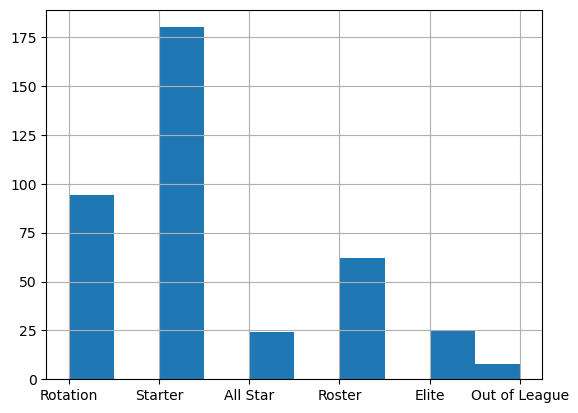

In [27]:
# Show the distribution of career outcomes
training_df['Career Outcome'].hist()
plt.show()

In [28]:
# Define the X and y variables 
X = training_df.drop(['experience', 'Career Outcome'], axis = 1)
y = training_df['Career Outcome']

In [29]:
# Create a train test split of the features and outcome measure
indices = training_df.index.values

X_train, X_test, index_train, index_test = train_test_split(X, indices, test_size = 0.2)
y_train, y_test = y[index_train], y[index_test]

# Scale the data for use in the preliminary logistic regression
sc_X = StandardScaler()
sc_X.fit(X_train)
X_train_std = sc_X.transform(X_train)
X_test_std  = sc_X.transform(X_test)

In [30]:
# When inspecting the data previously there were some NaN
# values. Instead of deleting those entries, replace NaN
# with 0.
X_train_std = np.nan_to_num(X_train_std, nan=0)
X_test_std  = np.nan_to_num(X_test_std, nan=0)

In [31]:
# Fit the initial logistic regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_std, y_train)

LogisticRegression(solver='liblinear')

In [32]:
# Calculate the accuracy of the model
y_pred = lr.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3924050632911392


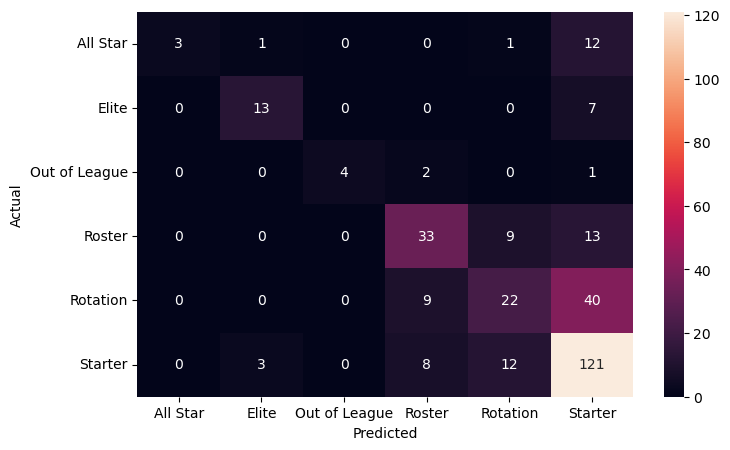

In [33]:
# Create the confusion matrix showing how the model performed
# on the training data
y_lr_train = lr.predict(X_train_std)

cm_lr_train = confusion_matrix(y_train,y_lr_train)

plt.figure(figsize = (8,5))
sns.heatmap(cm_lr_train, annot=True, fmt='.0f', 
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

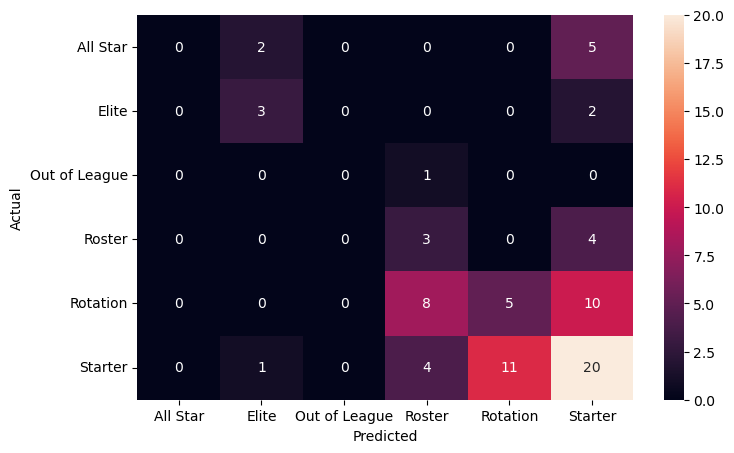

In [34]:
# Create the confusion matrix showing how the model performed
# on the test data
y_lr_test = lr.predict(X_test_std)

cm_lr_test = confusion_matrix(y_test,y_lr_test)

plt.figure(figsize = (8,5))
sns.heatmap(cm_lr_test, annot=True, fmt='.0f',
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Try a more complex model to see if we can improve performance
rf = RandomForestClassifier().fit(X_train_std, y_train)

y_pred = rf.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4050632911392405


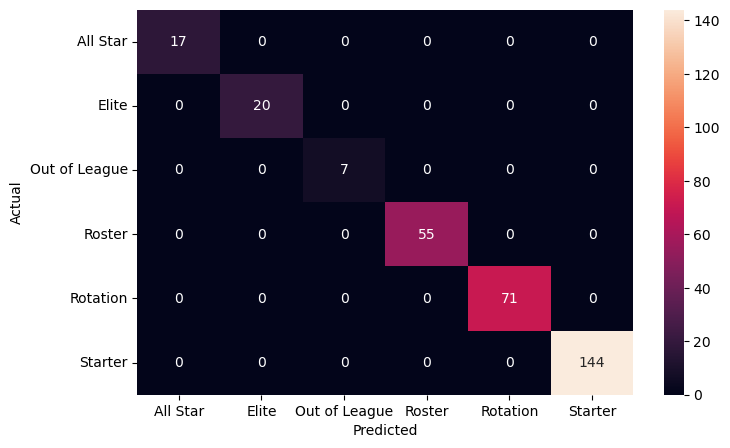

In [36]:
# Create the confusion matrix showing how the model performed
# on the training data
y_rf_train = rf.predict(X_train_std)

cm_rf_train = confusion_matrix(y_train,y_rf_train)

plt.figure(figsize = (8,5))
sns.heatmap(cm_rf_train, annot=True, fmt='.0f',
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

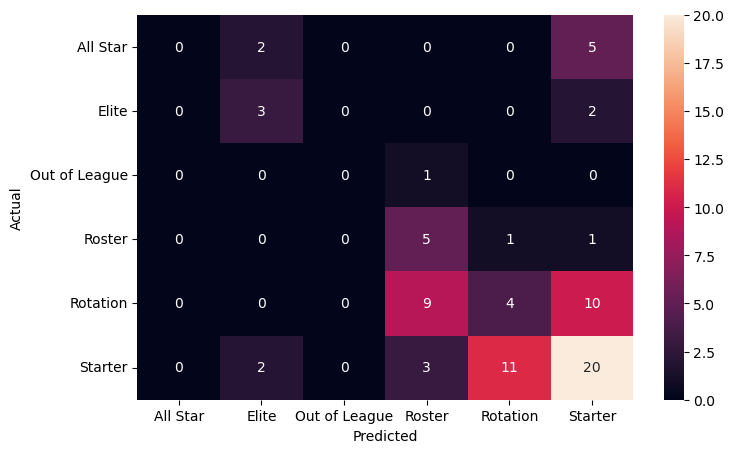

In [37]:
# Create the confusion matrix showing how the model performed
# on the test data
y_rf_test = rf.predict(X_test_std)

cm_rf_test = confusion_matrix(y_test,y_rf_test)

plt.figure(figsize = (8,5))
sns.heatmap(cm_rf_test, annot=True, fmt='.0f',
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Attempt to prune the random forest to optimize performance
# and prevent over fitting
grid_space={'max_depth':[3,5,10,None],
            'n_estimators':[10,100,200],
            'min_samples_leaf':[1,2,3],
            'min_samples_split':[2,4,6]}

In [39]:
# replace the NaN values in X with 0 like before
X = np.nan_to_num(X, nan=0)

In [40]:
# Run grid search cv to find the best set of parameters for the
# random forest
rf_pruned = RandomForestClassifier()

grid = GridSearchCV(rf_pruned, param_grid=grid_space, cv=3, scoring='f1_micro')
model_grid = grid.fit(X,y)

In [41]:
# Print the best combination of parameters
print(model_grid.best_params_)
print(model_grid.best_score_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
0.5368956743002544


In [49]:
# Fit a random forest with the set of optimized parameters
rf_optimized = RandomForestClassifier(max_depth = 5, 
                                      min_samples_leaf = 2, 
                                      min_samples_split = 4,
                                      n_estimators = 100).fit(X_train_std, y_train)

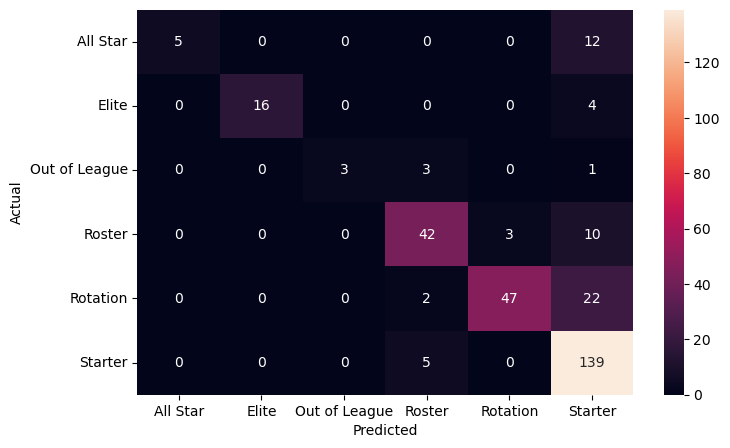

In [50]:
# Create the confusion matrix showing how the model performed
# on the training data
y_rfo_train = rf_optimized.predict(X_train_std)

cm_rfo_train = confusion_matrix(y_train,y_rfo_train)

plt.figure(figsize = (8,5))
sns.heatmap(cm_rfo_train, annot=True, fmt='.0f',
            xticklabels=rf_optimized.classes_, 
            yticklabels=rf_optimized.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

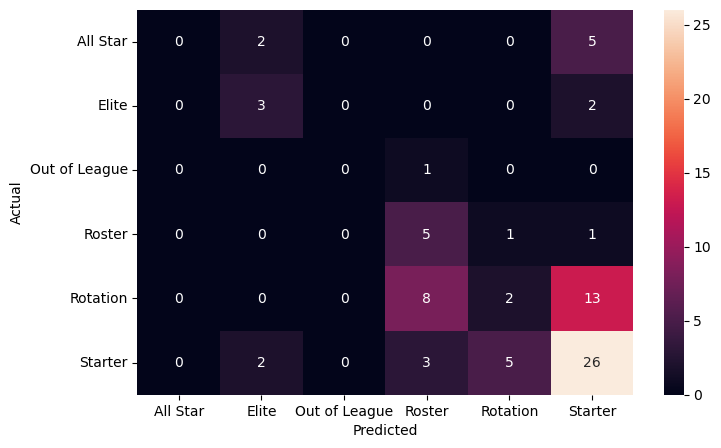

In [51]:
# Create the confusion matrix showing how the model performed
# on the test data
y_rfo_test = rf_optimized.predict(X_test_std)

cm_rfo_test = confusion_matrix(y_test,y_rfo_test)

plt.figure(figsize = (8,5))
sns.heatmap(cm_rfo_test, annot=True, fmt='.0f',
            xticklabels=rf_optimized.classes_, 
            yticklabels=rf_optimized.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

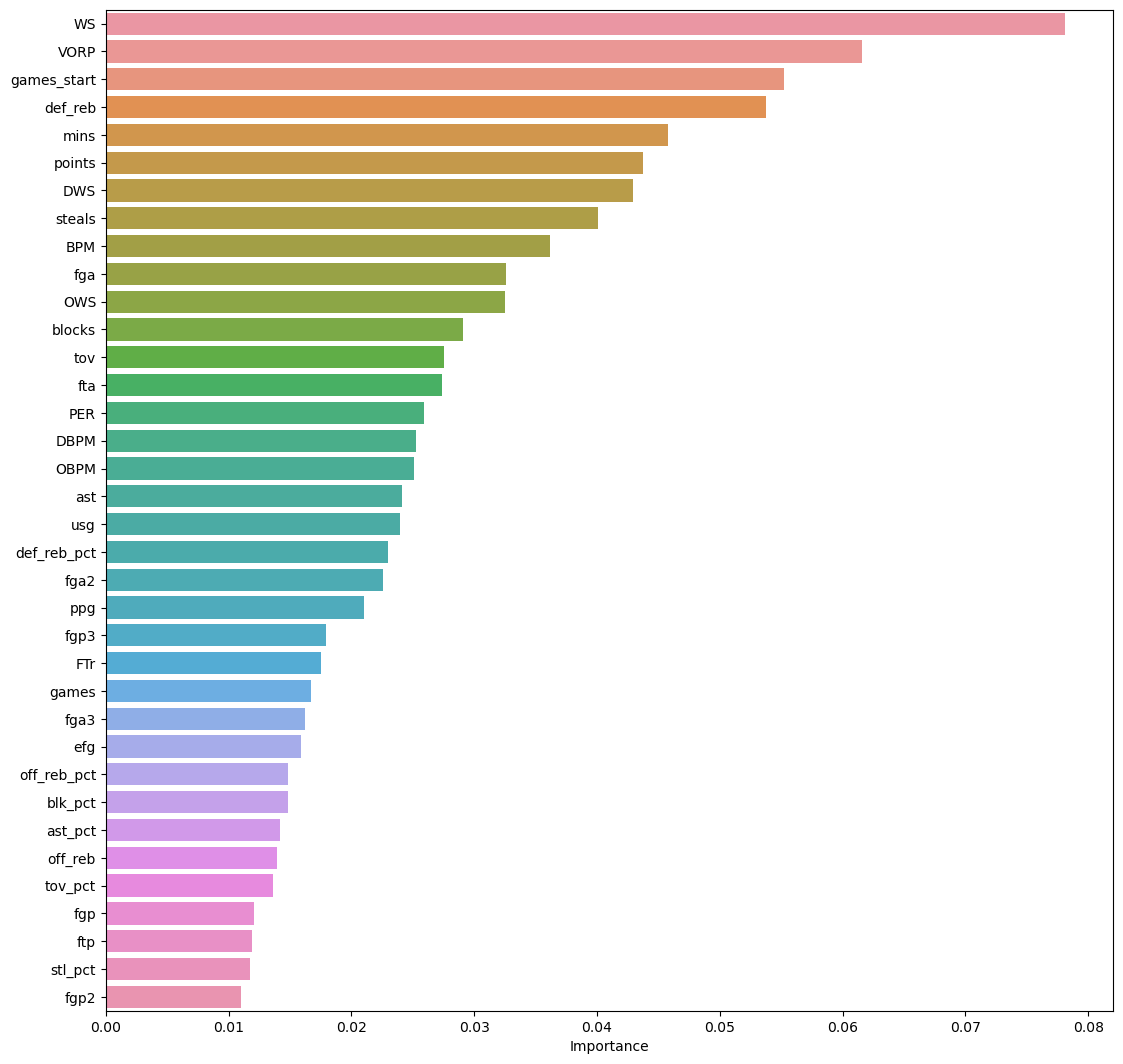

In [85]:
# Show the feature importances of the optimized model
importances = rf_optimized.feature_importances_
columns = training_df.drop(['experience','Career Outcome'], axis = 1).columns
importance_df = pd.DataFrame(importances, 
                             index = columns, columns = ['Importance']).sort_values(by = 'Importance', 
                                                                                    ascending = False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance, y=importance_df.index)
plt.show()

In [79]:
# Create the dataframe used for predictions
predict_df = model_df.loc[model_df['draftyear'] >= 2018,:]
predict_df.drop(columns='draftyear', inplace=True)
predict_df.head()

/var/folders/9k/srd3d4y57zd_m4xfgwn_jxcw0000gn/T/ipykernel_76829/1462362811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df.drop(columns='draftyear', inplace=True)


,player,games,games_start,mins,fga,fgp,fga3,fgp3,fga2,fgp2,efg,fta,ftp,off_reb,def_reb,ast,steals,blocks,tov,points,PER,FTr,off_reb_pct,def_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,ppg,experience,Career Outcome
5942,Trae Young,81.0,81.0,2503.0,1256,0.418,482,0.324,774,0.477,0.480,414,0.829,64,237,653,72,15,308,1549,17.0,0.330,0.026,0.102,0.405,0.013,0.005,0.176,0.284,2.5,0.7,3.3,2.3,-2.8,-0.6,0.9,19.123457,1,All Star
5943,Omari Spellman,46.0,11.0,805.0,244,0.402,128,0.344,116,0.466,0.492,45,0.711,72,122,47,26,25,31,272,12.4,0.184,0.092,0.163,0.080,0.015,0.027,0.105,0.149,0.6,0.5,1.2,-0.5,-0.7,-1.2,0.2,5.913043,1,Out of League
5946,Kevin Huerter,75.0,59.0,2048.0,657,0.419,353,0.385,304,0.457,0.522,56,0.732,60,185,214,65,25,109,727,10.1,0.085,0.030,0.097,0.145,0.015,0.011,0.138,0.157,0.7,0.7,1.5,-1.6,-0.8,-2.4,-0.2,9.693333,1,Rotation
5951,B.J. Johnson,6.0,0.0,43.0,16,0.500,6,0.500,10,0.500,0.594,2,1.000,2,6,0,2,0,2,21,14.0,0.125,0.048,0.150,0.000,0.021,0.000,0.106,0.179,0.0,0.0,0.1,-1.5,-1.4,-2.9,0.0,3.500000,1,Out of League
5959,Jaylen Adams,34.0,1.0,428.0,110,0.345,74,0.338,36,0.361,0.459,9,0.778,11,49,65,14,5,28,108,7.6,0.082,0.026,0.123,0.198,0.015,0.010,0.197,0.135,-0.1,0.2,0.1,-3.8,-0.5,-4.3,-0.2,3.176471,1,Out of League


In [87]:
predict_df = predict_df.groupby('player').mean(numeric_only=True)

,games,games_start,mins,fga,fgp,fga3,fgp3,fga2,fgp2,efg,fta,ftp,off_reb,def_reb,ast,steals,blocks,tov,points,PER,FTr,off_reb_pct,def_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,ppg,experience,All Star,Elite,Out of League,Roster,Rotation,Starter
player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Henry,6.0,0.0,17.0,5.0,0.2000,1.0,0.0000,4.0,0.2500,0.2000,0.0,NaN,0.0,1.0,0.0,0.0,2.0,2.0,2.0,-7.40,0.0000,0.0000,0.0650,0.0000,0.0000,0.1060,0.2860,0.1850,-0.10,0.00,-0.10,-14.00,-2.40,-16.50,-0.10,0.333333,1.0,0.079064,0.040457,0.010581,0.053173,0.201790,0.614935
Aaron Holiday,55.4,13.2,1027.4,319.8,0.4166,126.6,0.3776,193.2,0.4428,0.4876,57.6,0.8458,13.2,73.6,117.6,32.8,10.2,52.2,359.2,11.78,0.1932,0.0198,0.0948,0.1938,0.0186,0.0096,0.1374,0.1962,0.08,0.84,0.92,-1.98,-0.06,-2.04,-0.04,7.094330,2.8,0.153035,0.225336,0.001617,0.014437,0.066413,0.539162
Aaron Nesmith,54.5,2.0,702.5,180.0,0.4170,111.5,0.3200,68.5,0.5775,0.5160,27.0,0.7970,21.5,86.5,22.5,17.5,7.0,27.0,207.0,8.35,0.1500,0.0375,0.1510,0.0500,0.0140,0.0105,0.1230,0.1545,0.05,0.75,0.75,-3.90,0.15,-3.75,-0.25,4.254181,1.5,0.152312,0.225336,0.011617,0.014437,0.065329,0.530969
Aaron Wiggins,50.0,35.0,1209.0,337.0,0.4630,138.0,0.3040,199.0,0.5730,0.5250,85.0,0.7290,51.0,127.0,68.0,30.0,10.0,54.0,416.0,10.30,0.2520,0.0430,0.1100,0.0850,0.0120,0.0080,0.1260,0.1530,0.50,0.80,1.20,-3.40,-0.90,-4.30,-0.70,8.320000,1.0,0.155113,0.207503,0.011617,0.015546,0.069464,0.540757
Adam Mokoka,15.5,0.0,104.5,23.5,0.3985,12.5,0.2500,11.0,0.5645,0.4655,2.5,0.2500,4.0,3.5,4.5,3.0,0.5,3.5,23.5,5.20,0.0980,0.0430,0.0545,0.0845,0.0170,0.0080,0.1340,0.1550,-0.05,0.10,0.05,-5.40,-1.60,-7.00,-0.10,1.990260,1.5,0.170004,0.174465,0.012536,0.035018,0.108064,0.499913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeke Nnaji,46.5,1.0,595.5,145.0,0.4985,69.5,0.4350,75.5,0.5675,0.6060,40.0,0.7155,35.0,71.0,13.5,12.0,8.5,15.0,203.0,12.40,0.2465,0.0665,0.1430,0.0335,0.0105,0.0135,0.0785,0.1390,0.90,0.45,1.35,-0.70,-1.50,-2.15,0.00,4.911731,1.5,0.167528,0.253292,0.001429,0.024109,0.067524,0.486119
Zhaire Smith,7.5,1.0,75.5,22.5,0.3425,9.5,0.1875,13.0,0.4095,0.3865,6.0,0.6250,1.5,6.0,6.0,2.5,1.0,4.0,24.0,5.30,0.2995,0.0145,0.0810,0.1025,0.0270,0.0070,0.1370,0.1815,-0.05,0.10,0.00,-6.80,-0.70,-7.50,-0.10,3.904762,1.5,0.168771,0.198034,0.011891,0.023007,0.080499,0.517798
Ziaire Williams,62.0,31.0,1346.0,424.0,0.4500,242.0,0.3140,182.0,0.6320,0.5400,55.0,0.7820,26.0,103.0,65.0,35.0,12.0,41.0,501.0,9.70,0.1300,0.0200,0.0820,0.0630,0.0120,0.0080,0.0840,0.1490,1.10,1.10,2.20,-2.40,-0.60,-3.00,-0.30,8.080645,1.0,0.181057,0.310037,0.010189,0.008804,0.059344,0.430569


In [81]:
# Find the prediction probabilities of each player in the predict_df
predict_X = predict_df.drop(columns='experience', axis=1)
predict_X = predict_X.fillna(0)
probabilities = rf_optimized.predict_proba(predict_X)

/Users/davidzack/opt/anaconda3/envs/w207_final/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [82]:
# Add the predictions to the predict_df
predict_df = predict_df.join(pd.DataFrame(data=probabilities, 
                                          columns=rf_optimized.classes_, 
                                          index=predict_df.index))

In [83]:
# Output the predictions for the players requested in the prompt
predict_df.loc[['Shai Gilgeous-Alexander', 
                'Zion Williamson', 
                'James Wiseman', 
                'Josh Giddey'],
               ['All Star',
                'Elite',
                'Out of League',
                'Roster',
                'Rotation',
                'Starter']]

,All Star,Elite,Out of League,Roster,Rotation,Starter
player,,,,,,
Shai Gilgeous-Alexander,0.130110,0.710143,0.000000,0.000000,0.006955,0.152793
Zion Williamson,0.226296,0.599127,0.000000,0.000108,0.012935,0.161535
James Wiseman,0.151590,0.204903,0.011429,0.030433,0.077161,0.524484
Josh Giddey,0.153094,0.223506,0.001429,0.023994,0.069202,0.528775


## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

In [88]:
rebounding_data.head()

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
0,BOS,PHI,2022-10-18,1,10,39,0.256410
1,PHI,BOS,2022-10-18,1,8,42,0.190476
2,GSW,LAL,2022-10-18,1,16,57,0.280702
3,LAL,GSW,2022-10-18,1,14,57,0.245614
4,ORL,DET,2022-10-19,1,13,47,0.276596


In [90]:
OKC_rebounding = rebounding_data.loc[rebounding_data['team'] == 'OKC',:]
OKC_rebounding.head()

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
19,OKC,MIN,2022-10-19,1,20,63,0.317460
63,OKC,DEN,2022-10-22,2,15,56,0.267857
81,OKC,MIN,2022-10-23,3,15,57,0.263158
107,OKC,LAC,2022-10-25,4,26,71,0.366197
135,OKC,LAC,2022-10-27,5,14,49,0.285714


In [92]:
OKC_predict = OKC_rebounding.loc[OKC_rebounding['game_number'] < 81]
prediction = OKC_predict['offensive_rebounds'].sum()/OKC_predict['off_rebound_chances'].sum()
print(prediction)

0.288689755388714


<strong><span style="color:red">ANSWER 1:</span></strong>  

28.9% 

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2:</span></strong>  
To account for missing players, I would start by using individual player offensive rebounding data. The sum of all individual players' offensive rebounds would be equivalent to the number of offensive rebounds listed in `rebounding_data`. I would then calculate the percentage of offensive rebounds collected by each player and use that to decrement the overall offensive rebounding percentage if a player is out due to injury. In other words, if a player who grabs 25% of the team's offensive rebounds is out in the subsequent game, the new model would predict we are only going to collect 75% of our predicted offensive rebounds. 

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:red">ANSWER 3:</span></strong>
Along with the weakness outlined in question two, there are two additional key weaknesses I think should be addressed:
- Weakness 1: not accounting for opponents
- Weakness 2: more noisy early in the season
For weakness 1, if an opposing team has a great defensive rebounder or a great defensive rebouding percentage, you would expect that to impact the amount of offensive rebounds gathered. For weakness 2, by only averaging across a season, the rebounding prediction will jump around quite a bit early in the season before stabilizing. This could impact game predictions and roster decisions.

To address these, I would add a percent above/below league average defensive rebounding statistic for the opposition team and use that to modify the expected offensive rebounding percentage similar to question 2. I would also include individual player information that should allow you to more accurately predict how well you are going to rebound across seasons.

Thank you for the opportunity to complete this assessment. I look forward to hearing from you.